# Pivot data: Texas Ethics Commisison data

This [data set](https://drive.google.com/file/d/0B8ConnGcXrv8SmlQQzNVOEtmRGc/view) is of the amount of money raised  by Texas Legislature candidates over several years, as provided by the Texas Ethics Commission. The data set was later annotated by a reporter with the race and party of each candidate, and totals for candidates running for statewide office were removed as their totals would skew simple statistics.

The question is: Do candidates of color receive a smaller piece of the campaign cash pie than their white counterparts. We wanted to test that theory.

So here we get some basic totals information, and also to figure out if minority Legislators "earn" contributions smaller than their share of the legislature as a whole.

These are the questions we are answering:

- Q1.1: Who made the most overall for the time period?
- Q1.2: Who made the most in the most recent election cycle?
- Q2: What was the average amount raised each election cycle by Democrats and Republicans?
- Q3: What was the average amount raised overall by race?
- Q4: Of the totals raised, what percentage was raised by race?
- Q5: Of the total candidates, what is their percentage of the total by race?

How does the percentage given by race compare to the makeup of the legislature as a whole?



In [1]:
import agate
import agateexcel
import warnings
warnings.filterwarnings('ignore')

/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__

/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
/anaconda3/envs/data/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__

In [2]:
# sets Year as text instead of number
specified_types = {
    'Year': agate.Text(),
}

# import the data
raw = agate.Table.from_xlsx('../data/tec-totals-cleaned.xlsx', column_types=specified_types)

# print the columns
print(raw)

| column         | data_type |
| -------------- | --------- |
| Name           | Text      |
| Candidate      | Text      |
| Party          | Text      |
| Year           | Text      |
| Election cycle | Text      |
| Amount         | Number    |
| Race-Ethnicity | Text      |



In [3]:
# exclude original name column. we just need the cleaned one

raw_selected = raw.exclude('Name')
print(raw_selected)

| column         | data_type |
| -------------- | --------- |
| Candidate      | Text      |
| Party          | Text      |
| Year           | Text      |
| Election cycle | Text      |
| Amount         | Number    |
| Race-Ethnicity | Text      |



In [4]:
# as a matter of habit, I do all my filtering,
# then reset the table to the last filter
# this way I can adjust filters above without affecting everything below
tec = raw_selected

In [5]:
# print top of table to see what it looks like
tec.limit(5).print_table()

| Candidate    | Party | Year | Election cycle |     Amount | Race-Ethnicity |
| ------------ | ----- | ---- | -------------- | ---------- | -------------- |
| Aaron Pena   | D     | 2009 | 2009-2010      |  35,543.13 | Hispanic       |
| Aaron Pena   | R     | 2010 | 2009-2010      |  70,550.00 | Hispanic       |
| Aaron Pena   | R     | 2011 | 2011-2012      |  58,893.18 | Hispanic       |
| Abel Herrero | D     | 2009 | 2009-2010      | 167,189.73 | Hispanic       |
| Abel Herrero | D     | 2012 | 2011-2012      | 538,533.00 | Hispanic       |


## Q1.1 Who made the most overall?

- pivot candidate, but add totals
- order the new table by total raised and print the top records

In [6]:
# pivot by candidate to see the basic pivot
print('The default for a .pivot is to count the rows:\n')
tec_candidate_pivot = tec.pivot('Candidate')
tec_candidate_pivot.print_table(5)


# We can amend the pivot to instead perform an aggregation, in this case a Sum of Amount.
tec_candidate_totals = tec.pivot('Candidate', aggregation=agate.Sum('Amount'))

# We then order the table by Sum reversed, then print the top 5
print('\nThis is the amended table:\n')
tec_candidate_totals.order_by('Sum', reverse=True).print_table(5)
print('\n Todd Hunter leads the pack.')

The default for a .pivot is to count the rows:

| Candidate      | Count |
| -------------- | ----- |
| Aaron Pena     |     3 |
| Abel Herrero   |     4 |
| Al Edwards     |     1 |
| Allan Ritter   |     5 |
| Allen Fletcher |     6 |
| ...            |   ... |

This is the amended table:

| Candidate          |          Sum |
| ------------------ | ------------ |
| Todd A. Hunter     | 3,407,905.19 |
| John Whitmire      | 3,407,483.58 |
| John Carona        | 3,346,511.95 |
| Juan Chuy Hinojosa | 3,212,715.51 |
| Kirk Watson        | 3,134,486.07 |
| ...                |          ... |

 Todd Hunter leads the pack.


## Q.2 Who made the most in most recent cycle
- pivot by candidate and eleciton cycle
- filter the result by the most recent eleciton cycle
- order by the amount reversed

In [7]:
# There are many ways to do this, but we'll do a pivot like above,
# but pivot on two columns instead of one
tec_pivot_cand_cycle = tec.pivot('Candidate', 'Election cycle', aggregation=agate.Sum('Amount'))
print('print the pivot table:\n')
tec_pivot_cand_cycle.print_table(5)


# Then we'll select only the most recent column, then order by the values there
# in reverse order
print('\nSelect one column, then order it;\n')
tec_pivot_cand_cycle.select(['Candidate', '2013-2014']).order_by('2013-2014', reverse=True).print_table(5)

print('\nKonni Burton made the most in 2013-2014.')

print the pivot table:

| Candidate      |  2009-2010 |  2011-2012 |  2013-2014 |
| -------------- | ---------- | ---------- | ---------- |
| Aaron Pena     | 106,093.13 |  58,893.18 |       0.00 |
| Abel Herrero   | 167,189.73 | 538,533.00 | 229,788.97 |
| Al Edwards     |  35,674.66 |       0.00 |       0.00 |
| Allan Ritter   | 185,028.82 | 401,040.55 |  10,000.00 |
| Allen Fletcher | 154,628.80 | 180,864.84 | 200,875.24 |
| ...            |        ... |        ... |        ... |

Select one column, then order it;

| Candidate         |    2013-2014 |
| ----------------- | ------------ |
| Konni Burton      | 2,742,737.50 |
| Brandon Creighton | 1,983,895.78 |
| Sylvia Garcia     | 1,831,889.32 |
| Don Huffines      | 1,637,242.83 |
| Todd A. Hunter    | 1,386,391.85 |
| ...               |          ... |

Konni Burton made the most in 2013-2014.


## Q2: What was the average amount raised each election cycle by Democrats and Republicans?
- Pivot by Election Cycle and Part, and aggregate by mean
- Create a chart for each party

In [8]:
pivot_party_cycle = tec.pivot('Election cycle', 'Party', aggregation=agate.Mean('Amount'))
pivot_party_cycle.print_table()

| Election cycle |            D |            R |
| -------------- | ------------ | ------------ |
| 2009-2010      | 155,672.840… | 215,121.064… |
| 2011-2012      | 185,343.738… | 213,314.860… |
| 2013-2014      | 176,097.873… | 231,270.693… |


### Let's chart the results

Unfortunately, we can't plot both D and R on the same column chart in agate. (Major flaw, IMHO.) But we can select just the Dems and plot those, then the the GOP.

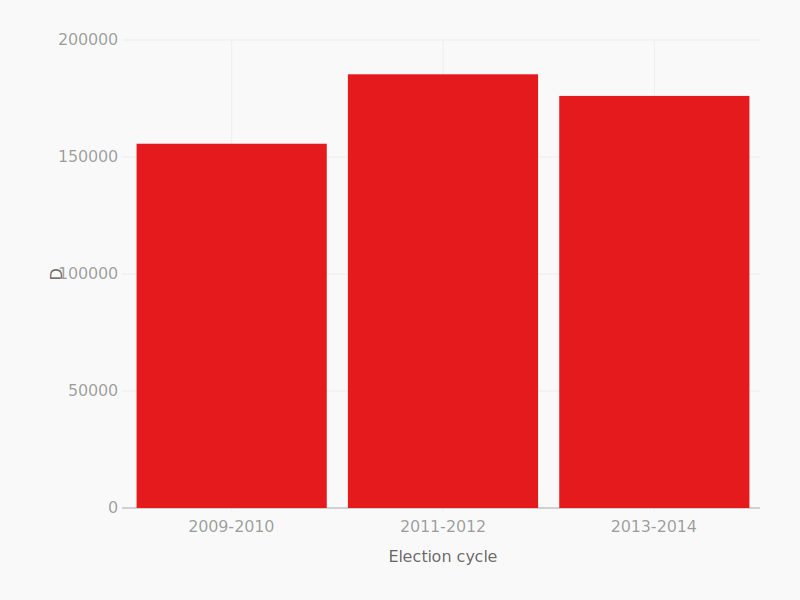

In [9]:
# first select the columns, then chart based on Eleciton cycle
pivot_party_cycle.select(['Election cycle', 'D']).column_chart('Election cycle')


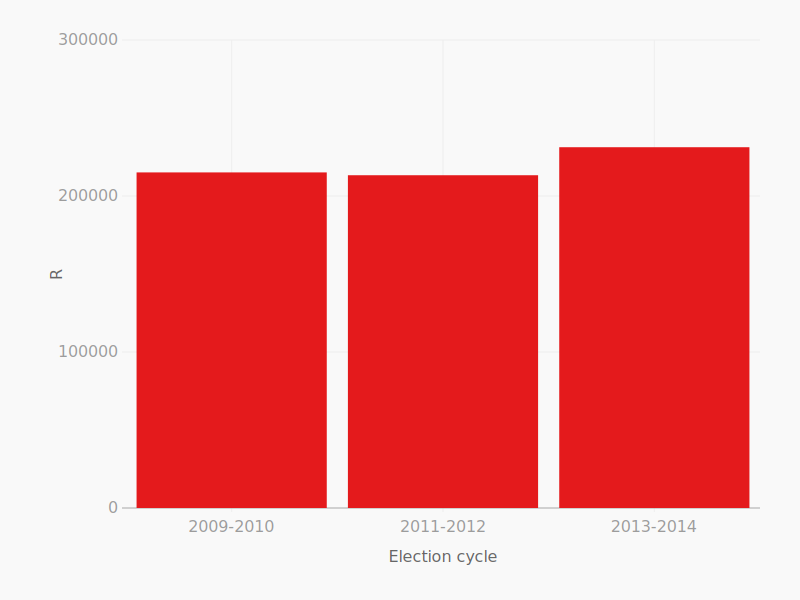

In [10]:
# same for GOP
pivot_party_cycle.select(['Election cycle', 'R']).column_chart('Election cycle')


### Alternate method

(PERHAPS THIS IS JUST CONFUSING AND I SHOULD STICK WITH PIVOTS)

A flaw in the method above is the charts are not on the same axis, so they are hard to compare.

To get charts of the average raised by party on the same axis, we have to approach this a little differently. We need a new row for each election cycle instead of a new column. To do this we will use `group_by` instead of `pivot`.

- Group the tec table by Party and Eleciton cycle
- Aggregate that table by the average raised

In [11]:
# create a 'TableSet' with group_by
tec_party_cycle = tec.group_by('Party').group_by('Election cycle')

# we can't print a TableSet, but we can aggregate the data and create our table

# create the average with an aggregation
tec_party_avg = tec_party_cycle.aggregate([
        ('Average raised', agate.Mean('Amount'))
    ])

# print the results
tec_party_avg.print_table()

| Party | Election cycle | Average raised |
| ----- | -------------- | -------------- |
| D     | 2009-2010      |   155,672.840… |
| D     | 2011-2012      |   185,343.738… |
| D     | 2013-2014      |   176,097.873… |
| R     | 2009-2010      |   215,121.064… |
| R     | 2011-2012      |   213,314.860… |
| R     | 2013-2014      |   231,270.693… |


### Chart by party

Agate's leather does not have a multiple column chart, which is what we really need here. Instead, we group_by our `tec_party_totals` by Party, and then create column charts using that group, which give us both parties on the same scale.


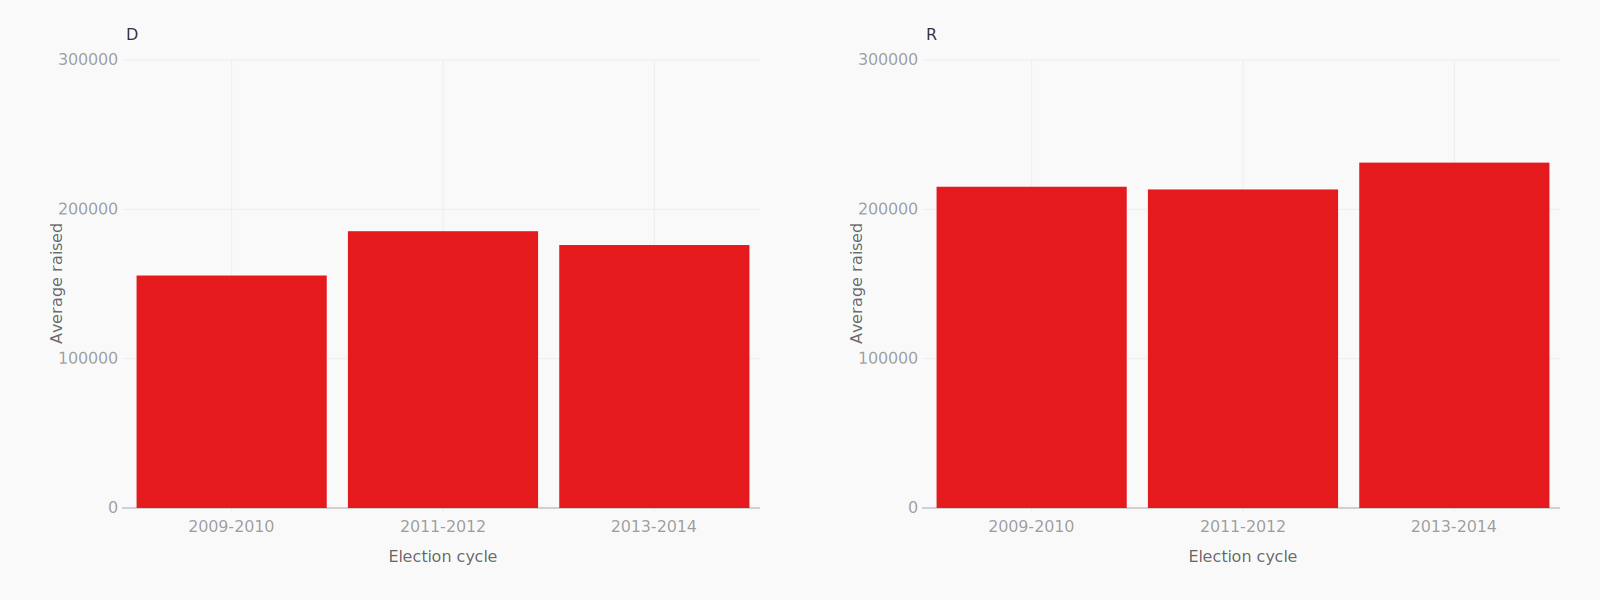

In [12]:
tec_party_avg.group_by('Party').column_chart('Election cycle', 'Average raised')


## Q3: What was the average amount raised overall by race?

- pivot by race, aggregate by Mean

In [13]:
# printing columns for reference
print(tec)

| column         | data_type |
| -------------- | --------- |
| Candidate      | Text      |
| Party          | Text      |
| Year           | Text      |
| Election cycle | Text      |
| Amount         | Number    |
| Race-Ethnicity | Text      |



In [14]:
# gets the average raced by race
race_average = tec.pivot('Race-Ethnicity', aggregation=agate.Mean('Amount'))
race_average.print_table()


| Race-Ethnicity |         Mean |
| -------------- | ------------ |
| Hispanic       | 188,139.289… |
| Black          | 159,519.456… |
| White          | 214,745.078… |
| Asian          | 132,153.272… |


## Q4: Of the totals raised, what percentage was raised by race?

This question shows you can create a computation based on the result of a pivot aggregation.

We are pivoting on Race-Ethnicity, and instead of countying the rows, we use an aggregation to sum the Amount. The then add a computation to get the Percent of each row of the pivot. I show both tables.

In [15]:
# pivots on race, adds the amounts, then computes the percentage
race_total = tec.pivot('Race-Ethnicity', aggregation=agate.Sum('Amount'))
print('Table of the sums:\n')
race_total.print_table()

print('\nThen add the computation\n')
race_percent = tec.pivot('Race-Ethnicity', aggregation=agate.Sum('Amount'), computation=agate.Percent('Sum'))
race_percent.print_table()

Table of the sums:

| Race-Ethnicity |            Sum |
| -------------- | -------------- |
| Hispanic       |  45,153,429.40 |
| Black          |  17,387,620.72 |
| White          | 160,414,573.63 |
| Asian          |   1,982,299.08 |

Then add the computation

| Race-Ethnicity | Percent |
| -------------- | ------- |
| Hispanic       | 20.074… |
| Black          |  7.730… |
| White          | 71.315… |
| Asian          |  0.881… |


## Q5: Of the total candidates, what is their percentage of the total by race?

- We have to get count of distinct candidates by race
- We can get the distribution with `agate.Perent` which gets percent of totals for columns submitted.

In [16]:
# create new candidates table with name, race based on distinct candidate name
candidates = tec.select(['Candidate', 'Race-Ethnicity']).distinct('Candidate')
print('Length of tec: {}'.format(len(tec)))
print('Length of candidates: {}\n'.format(len(candidates)))
# pivot candidates by race, but compute percent of count
candidates_pivot = candidates.pivot('Race-Ethnicity', computation=agate.Percent('Count'))
candidates_pivot.print_table()

Length of tec: 1111
Length of candidates: 295

| Race-Ethnicity | Percent |
| -------------- | ------- |
| Hispanic       | 21.017… |
| Black          |  7.797… |
| White          | 70.169… |
| Asian          |  1.017… |


## The answer

Comparing the two tables of the percent of contributions by race vs the percentage of the body by race, they are not much different.